# Tarea 3

Primero implementaremos el método de enumeración exacta para el caminante aleatorio en $1D$ con la peculiaridad de que tiene una probabilidad $R$ de quedarse en el mismo sitio y una probabilidad $1-R$ de moverse. Además, si da un paso tiene una probabilidad $Q$ de ir a la derecha y una probabilidad $1-Q$ de ir a la izquierda.

In [1]:
using PyPlot

In [2]:
using Interact

#### Procedimiento

Como en el ejercicio en clase, crearemos una función que tenga una recurrencia respecto a cada uno de los pasos. Nuestra regla de recurrencia será:

\begin{equation}
P_{t+1}(x)=(1-R)(1-Q)P_t(x-1)+RP_t(x)+(1-R)QP_t(x+1)
\end{equation}

Donde $P_{t}(x)$ representa la probabilidad de que al tiempo $t$ nuestro caminante se encuentre en la posición $x$ y $R,Q$ son como los describimos anteriormente.

##### Función 1: distribucion(tiempo,R,Q)

1. Entradas
    - tiempo: corresponde al tiempo en el que tendremos expresada nuestra distribución de salida.
    - R: es la probabilidad de que nuestro caminante se quede en el mismo sitio.
    - Q: es la probabilidad de que cuando de un paso, éste sea hacia la derecha.
2. Salidas
    - distribucion[1]: nos arroja un vector con las probabilidades para cada posición 
    - distribucion[2]: corresponde a un vector con las posiciones posibles que puede tomar el caminante

In [3]:
function distribucion(tiempo::Int,R,Q)
    L=tiempo+1 #Ésto nos dará el tamaño de nuestra caja    
    valores_posibles=[-L:L] #Nos genera un vector con las posiciones posibles que puede tomar nuestro caminante
    probabilidad=zeros(length(valores_posibles)) #Primer vector para hacer la distribución
    probabilidad2=zeros(length(valores_posibles)) #Segundo vector para hacer la distribución
    probabilidad[L+1]=1 #Condiciones iniciales de nuestro sistema
    #Aquí ponemos la regla de recurrencia que seguirá nuestra función para encontrar la distribución de probabilicad
    for t=1:tiempo
       for i=2:length(probabilidad)-1
            probabilidad2[i]=probabilidad[i-1]*(1-R)*(1-Q)+probabilidad[i+1]*(1-R)*Q+probabilidad[i]*R
        end
        probabilidad,probabilidad2=probabilidad2,probabilidad
    end
    #La función nos regresa las probabilidades en un vector junto con las posiciones posibles en otro..
    return probabilidad, valores_posibles
end

distribucion (generic function with 1 method)

#### Función 2: graficar(intervalo,R,Q)

1. Entradas
    - intervalo: es el intervalo de tiempos que se graficarán
    - R: es la probabilidad de quedarse en el mismo sitio
    - Q: es la probabilidad de moverse a la derecha
2. Salidas
    - Gráficas de la distribución de probabilidad escalada en los distintos tiempos del intervalo

In [4]:
function graficar(intervalo,R,Q)
    for i in intervalo
        plot(distribucion(i,R,Q)[2]/sqrt(i),distribucion(i,R,Q)[1]*sqrt(i))
    end
    xlabel("x/t^(1/2)")
    ylabel("P_t(x)*t^(1/2)")
    title("Distribución de probabilidad")
end

graficar (generic function with 1 method)

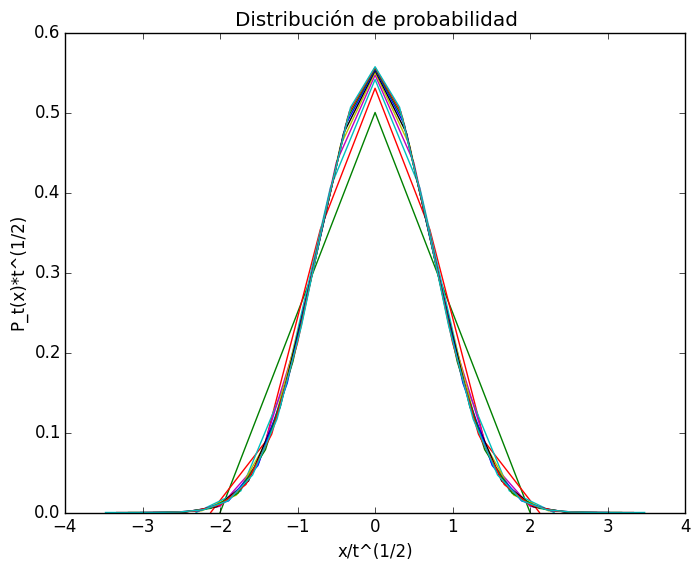

PyObject <matplotlib.text.Text object at 0x3115912d0>

In [5]:
graficar(0:10,0.5,0.5)

Ahora cuando la probabilidad inicial está repartida entre distintas celdas, es decir, cuando $P_0(x)$ tiene alguna distribución específica.


#### Implementación

Primero definiremos una condición inicial y un intervalo lo suficientemente grande como para graficar apropiadamente.
Después usaremos la función @manipulate del paquete Interact para graficar la evolución de ésta distribución con el tiempo.

#### Función 1: Método 2: distribucion(tiempo,R,Q,L)

1. Entradas
    - tiempo: corresponde al tiempo en el que tendremos expresada nuestra distribución de salida.
    - R: es la probabilidad de que nuestro caminante se quede en el mismo sitio.
    - Q: es la probabilidad de que cuando de un paso, éste sea hacia la derecha.
    - L: es el tamaño de la caja
2. Salidas
    - distribucion[1]: nos arroja un vector con las probabilidades para cada posición 
    - distribucion[2]: corresponde a un vector con las posiciones posibles que puede tomar el caminante

In [6]:
function distribucion(tiempo::Int,R,Q,L)
    #Ésto nos dará el tamaño de nuestra caja    
    valores_posibles=[-L:L] #Nos genera un vector con las posiciones posibles que puede tomar nuestro caminante
    probabilidad=zeros(length(valores_posibles)) #Primer vector para hacer la distribución
    probabilidad2=zeros(length(valores_posibles)) #Segundo vector para hacer la distribución
    probabilidad[L+1]=1/3
    probabilidad[L+6]=1/3
    probabilidad[L-4]=1/3
     #Condiciones iniciales de nuestro sistema, tendremos tres puntos con probabilidad distribuida entre ellos
    #Aquí ponemos la regla de recurrencia que seguirá nuestra función para encontrar la distribución de probabilicad
    for t=1:tiempo
       for i=2:length(probabilidad)-1
            probabilidad2[i]=probabilidad[i-1]*(1-R)*(1-Q)+probabilidad[i+1]*(1-R)*Q+probabilidad[i]*R
        end
        probabilidad,probabilidad2=probabilidad2,probabilidad
    end
    #La función nos regresa las probabilidades en un vector junto con las posiciones posibles en otro..
    return probabilidad, valores_posibles
end

distribucion (generic function with 2 methods)

In [8]:
fig=figure(figsize=(6,4))
@manipulate for tiempo=1:20
    withfig(fig) do
         plot(distribucion(tiempo,0.5,0.5,20)[2]/sqrt(tiempo),distribucion(tiempo,0.5,0.5,20)[1]*sqrt(tiempo),"r")
         xlabel("x/t^(1/2)")
        ylabel("P_t(x)*t^(1/2)")
        title("Distribución de probabilidad")
        end
end


Interact.Slider{Int64}([Reactive.Input{Int64}] 10,"tiempo",10,1:20)

## Tiempos de primer paso: Sistemas con absorción

Ahora usaremos el método de enumeración para un sistema con paredes y además con un pozo en cero.

#### Implementación

Haremos una función que cumpla con las características:
   - Si va a saltar fuera de la caja con cierta probabilidad, dicha probabilidad se sumará a la probabilidad de que se quede en la frontera en vez de eso.
   - Si llega al cero con cierta probabilidad, dicha probabilidad se guarda en un valor aparte.

#### Función 3: distribucion2(tiempo,R,Q,L)

1. Entradas
    - tiempo: corresponde al tiempo en el que tendremos expresada nuestra distribución de salida.
    - R: es la probabilidad de que nuestro caminante se quede en el mismo sitio.
    - Q: es la probabilidad de que cuando de un paso, éste sea hacia la derecha.
    - L: es el tamaño de la caja
2. Salidas
    - distribucion2[1]: nos arroja un vector con las probabilidades para cada posición 
    - distribucion2[2]: nos da la probabilidad de que el caminante ya se haya caído al pozo

In [92]:
function distribucion2(tiempo::Int,R,Q,L)    
    valores_posibles=[0:L] #Nos genera un vector con las posiciones posibles que puede tomar nuestro caminante
    probabilidad=zeros(length(valores_posibles)) #Primer vector para hacer la distribución
    probabilidad2=zeros(length(valores_posibles)) #Segundo vector para hacer la distribución
    probabilidad3=0.0
    probabilidad[2]=1   #Condiciones iniciales de nuestro sistema
    frontera=length(probabilidad)
  
    #Aquí ponemos la regla de recurrencia que seguirá nuestra función para encontrar la distribución de probabilicad
    for t=1:tiempo
       probabilidad3+=probabilidad[2]*(1-R)*(1-Q) #Probabilidad de caer en el pozo y desaparecer
       probabilidad2[frontera]=probabilidad[frontera]*(R+(1-R)*Q)+probabilidad[frontera-1]*(1-R)*Q 
       for i=2:frontera-1
            probabilidad2[i]=probabilidad[i-1]*(1-R)*(1-Q)+probabilidad[i+1]*(1-R)*Q+probabilidad[i]*R
        end
        probabilidad,probabilidad2=probabilidad2,probabilidad
    end
    #La función nos regresa las probabilidades en un vector junto con las posiciones posibles en otro..
    return probabilidad,probabilidad3
    
end

distribucion2 (generic function with 2 methods)

Para asegurar que se conserva la probabilidad, deberíamos observar que la probabilidad de que caiga sumada a las probabilidades de estar en la misma posición deben ser iguales a 1. Ésto lo podemos ver a continuación:

In [94]:
sum(distribucion2(1000,0.5,0.5,50)[1])+distribucion2(1000,0.5,0.5,50)[2]

1.0

Haremos una nueva función para guardar las probabilidades de caerse en el pozo en un tiempo $T$ y para distintos valores de $L$

#### Función 4: promedio_cajas(T,L)

1. Entradas
    - T: es el tiempo que habrá pasado
    - L: es el tamaño de la caja máxima que tendremos
2. Salidas
    - promedio_cajas: es la probabilidad de que caiga en el pozo al tiempo T en las distintas cajas

In [89]:
function promedio_cajas(T,L)
    probabilidad=Float64[];
    for l=1:L
        push!(probabilidad,distribucion2(T,0.5,0.5,l)[2])
    end
    return probabilidad
end

promedio_cajas (generic function with 1 method)

#### Función 5: distribucion_tiempo(T,L)

1. Entradas
    - T: es el tiempo máximo que graficaremos
    - L: es el tamaño de la caja máxima que tendremos
2. Salidas
    - Obtendremos varias gráficas para distintos tiempos $T$ en función del tamaño de la caja 

In [90]:
function distribucion_tiempo(T,L)
    for t=1:T
    plot(1:L,promedio_cajas(t,L))
    end
    title("Distribución de probabilidad para distintos T en distintas cajas")
    xlabel("Tamaño de caja")
    ylabel("Probabilidad")
end

distribucion_tiempo (generic function with 1 method)

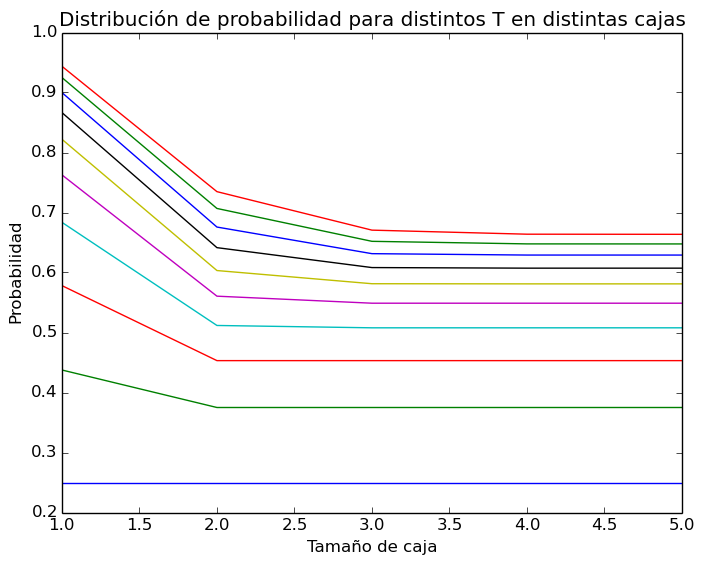

PyObject <matplotlib.text.Text object at 0x7fcd8dc14650>

In [91]:
distribucion_tiempo(10,5)